Here, I consider both Rain and LE as Cumulative and play the unit 1W/m2= 0.035mm/day for every 15mins of model time step.
So, 1/96 is equal to 15mins in a day.
Check Unit play and Mean two files always.
Results are always different.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

In [2]:
# Load the data'
df = pd.read_excel("SE15Y_resultats.xlsx")
df.head()

,date,Rg,Rn_measured,Rn_calcultated,Rn_used,T_soilref,Ta,RHa,uref,LAI_total,...,FNH3_soil,FNH3_cut,FNH3_stom,FNH3_canopy,FNH3_tot,NH3_canopy,NH3_leaf,NH3_soil,Drain_Runoff,Surface_Runoff
0,2013-01-01 00:00:00,6999,-20.878000,12887.13961,-20.878000,8.736833,7.316000,99.400000,1.786107,2.4,...,0.003395,-0.002124,0.0,-0.002123,0.001271,0.108232,0.063707,2.365732,5.911582,6656
1,2013-01-01 00:15:00,6999,-17.027333,10836.44924,-17.027333,8.724750,7.325333,99.413333,2.058361,2.4,...,0.003468,-0.002032,0.0,-0.002032,0.001437,0.104377,0.060958,2.410845,0.299747,6656
2,2013-01-01 00:30:00,6999,-16.450000,10836.21080,-16.450000,8.712667,7.320667,99.526667,2.142631,2.4,...,0.003479,-0.002001,0.0,-0.002001,0.001478,0.102905,0.060027,2.416238,0.499743,6656
3,2013-01-01 00:45:00,6999,-21.473333,10837.31474,-21.473333,8.712500,7.319333,99.600000,2.195486,2.4,...,0.003411,-0.001970,0.0,-0.001970,0.001441,0.100222,0.059112,2.368507,0.399843,6656
4,2013-01-01 01:00:00,6999,-21.625333,10837.46820,-21.625333,8.712333,7.330000,99.633333,2.108225,2.4,...,0.003405,-0.002001,0.0,-0.002001,0.001404,0.101776,0.060041,2.366414,0.299858,6656


In [3]:
df.isna().sum()

date               0
Rg                 0
Rn_measured        0
Rn_calcultated     0
Rn_used            0
                  ..
NH3_canopy         0
NH3_leaf           0
NH3_soil           0
Drain_Runoff       0
 Surface_Runoff    0
Length: 91, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 91 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           35040 non-null  datetime64[ns]
 1   Rg                             35040 non-null  int64         
 2   Rn_measured                    35040 non-null  float64       
 3   Rn_calcultated                 35040 non-null  float64       
 4   Rn_used                        35040 non-null  float64       
 5   T_soilref                      35040 non-null  float64       
 6   Ta                             35040 non-null  float64       
 7   RHa                            35040 non-null  float64       
 8   uref                           35040 non-null  float64       
 9   LAI_total                      35040 non-null  float64       
 10  LAI_green                      35040 non-null  float64       
 11  displacement_he

In [5]:
df = df.drop(index=0).reset_index().drop(columns="index")

In [6]:

df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y %H:%M:%S')
df.head()

,date,Rg,Rn_measured,Rn_calcultated,Rn_used,T_soilref,Ta,RHa,uref,LAI_total,...,FNH3_soil,FNH3_cut,FNH3_stom,FNH3_canopy,FNH3_tot,NH3_canopy,NH3_leaf,NH3_soil,Drain_Runoff,Surface_Runoff
0,2013-01-01 00:15:00,6999,-17.027333,10836.44924,-17.027333,8.724750,7.325333,99.413333,2.058361,2.4,...,0.003468,-0.002032,0.0,-0.002032,0.001437,0.104377,0.060958,2.410845,0.299747,6656
1,2013-01-01 00:30:00,6999,-16.450000,10836.21080,-16.450000,8.712667,7.320667,99.526667,2.142631,2.4,...,0.003479,-0.002001,0.0,-0.002001,0.001478,0.102905,0.060027,2.416238,0.499743,6656
2,2013-01-01 00:45:00,6999,-21.473333,10837.31474,-21.473333,8.712500,7.319333,99.600000,2.195486,2.4,...,0.003411,-0.001970,0.0,-0.001970,0.001441,0.100222,0.059112,2.368507,0.399843,6656
3,2013-01-01 01:00:00,6999,-21.625333,10837.46820,-21.625333,8.712333,7.330000,99.633333,2.108225,2.4,...,0.003405,-0.002001,0.0,-0.002001,0.001404,0.101776,0.060041,2.366414,0.299858,6656
4,2013-01-01 01:15:00,6999,-16.442000,10836.37128,-16.442000,8.711417,7.344000,99.653333,1.964618,2.4,...,0.003474,-0.002071,0.0,-0.002071,0.001403,0.106516,0.062121,2.416621,0.299770,6656


In [7]:
# Filter out negative values
filtered_df = df[(df['LEv'] >= 0) & (df['LEs'] >= 0) & (df['LE'] >= 0)]

In [8]:
Cumul_Daily_Rain = df.groupby(df['date'].dt.date)['Rain'].sum().cumsum()
Cumu_LE_mm = (filtered_df.groupby(filtered_df['date'].dt.date)['LE'].sum()*0.035/24/4).cumsum()
Cumu_LEv_mm = (filtered_df.groupby(filtered_df['date'].dt.date)['LEv'].sum()*0.035/24/4).cumsum()
Cumu_LEs_mm = (filtered_df.groupby(filtered_df['date'].dt.date)['LEs'].sum()*0.035/24/4).cumsum()

In [9]:
Cumu_LE_mm

date
2013-01-01      0.065769
2013-01-02      0.151456
2013-01-03      0.155670
2013-01-04      0.177163
2013-01-05      0.213379
                 ...    
2013-12-27    193.771526
2013-12-28    193.833622
2013-12-29    193.980433
2013-12-30    194.045252
2013-12-31    194.146146
Name: LE, Length: 364, dtype: float64

In [10]:
# Print or display the results
print(Cumu_LEv_mm)
print(Cumu_LEs_mm)
print(Cumu_LE_mm)

date
2013-01-01      0.016736
2013-01-02      0.039357
2013-01-03      0.041376
2013-01-04      0.042375
2013-01-05      0.044412
                 ...    
2013-12-27    119.242391
2013-12-28    119.255472
2013-12-29    119.303260
2013-12-30    119.307088
2013-12-31    119.310053
Name: LEv, Length: 364, dtype: float64
date
2013-01-01     0.049033
2013-01-02     0.112099
2013-01-03     0.114294
2013-01-04     0.134789
2013-01-05     0.168967
                ...    
2013-12-27    74.529135
2013-12-28    74.578151
2013-12-29    74.677173
2013-12-30    74.738164
2013-12-31    74.836093
Name: LEs, Length: 364, dtype: float64
date
2013-01-01      0.065769
2013-01-02      0.151456
2013-01-03      0.155670
2013-01-04      0.177163
2013-01-05      0.213379
                 ...    
2013-12-27    193.771526
2013-12-28    193.833622
2013-12-29    193.980433
2013-12-30    194.045252
2013-12-31    194.146146
Name: LE, Length: 364, dtype: float64


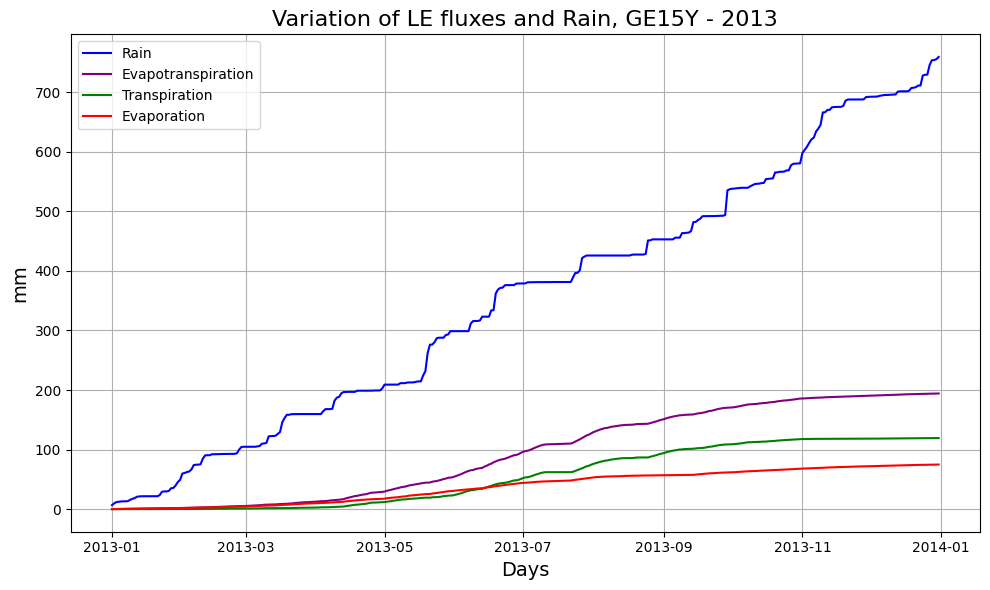

In [14]:
# Using matplotlib

plt.figure(figsize=(10, 6))
plt.plot(Cumul_Daily_Rain.index, Cumul_Daily_Rain , color='blue', label='Rain')
plt.plot(Cumu_LEv_mm.index, Cumu_LE_mm , color='purple', label='Evapotranspiration')
plt.plot(Cumu_LEv_mm.index, Cumu_LEv_mm , color='green', label='Transpiration')
plt.plot(Cumu_LEv_mm.index, Cumu_LEs_mm , color='red', label='Evaporation')
plt.title('Variation of LE fluxes and Rain, GE15Y - 2013', fontsize=16)  # Add a title
plt.xlabel('Days', fontsize=14)
plt.ylabel('mm', fontsize=14)
plt.grid(True)  # Add gridlines (optional)
# plt.xticks(rotation=45)  # Rotate X-axis labels for better readability (optional)
plt.tight_layout()  # Adjust layout to not cut off labels
plt.legend(loc='upper left')  # Display the legend
plt.show()

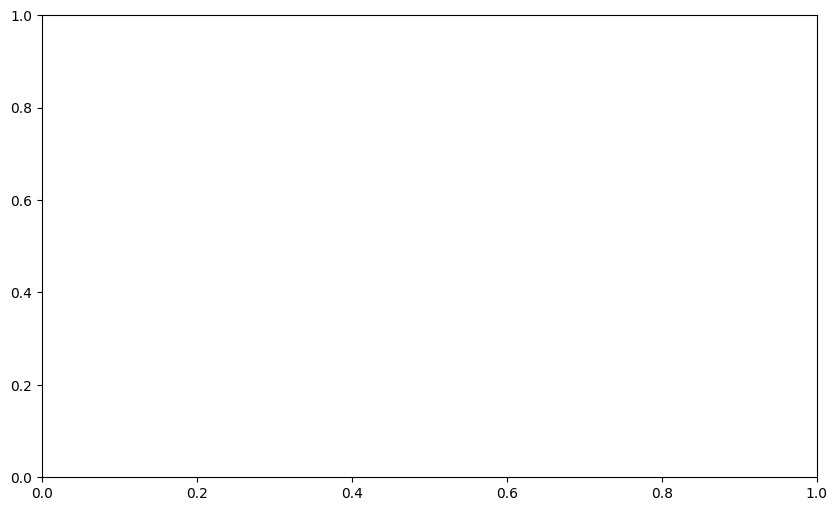

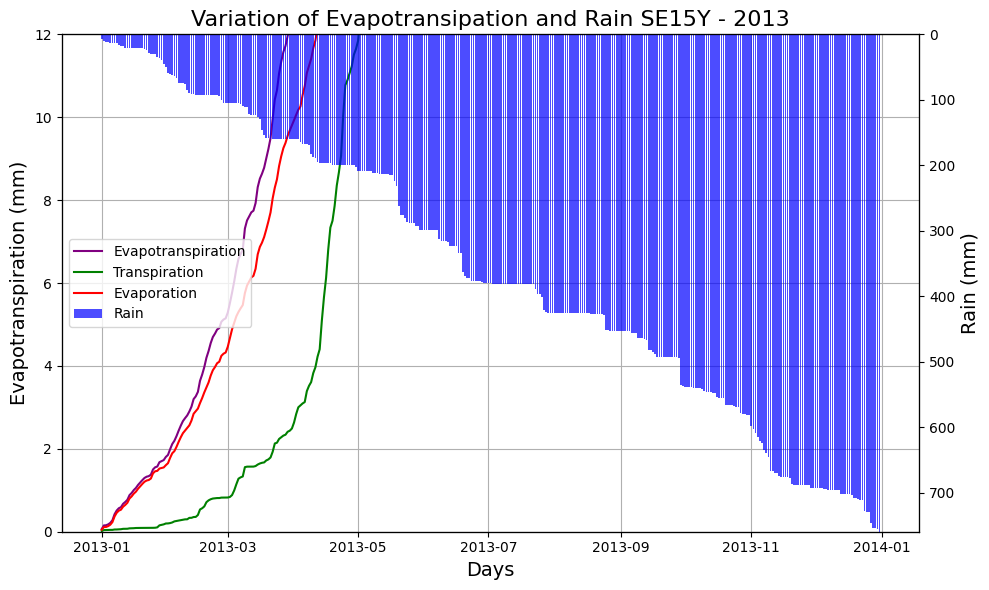

In [15]:
import matplotlib.pyplot as plt

# Assuming 'result_LEv_LEs' and 'result_Rain' DataFrames are already defined
fig, ax1 = plt.subplots(figsize=(10, 6))
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot LEv and LEs
ax1.plot(Cumu_LEv_mm.index, Cumu_LE_mm , color='purple', label='Evapotranspiration')
ax1.plot(Cumu_LEv_mm.index, Cumu_LEv_mm , color='green', label='Transpiration')
ax1.plot(Cumu_LEv_mm.index, Cumu_LEs_mm , color='red', label='Evaporation')

# Set the labels for the primary x and y axes
ax1.set_xlabel('Days', fontsize=14)
ax1.set_ylabel('Evapotranspiration (mm)', fontsize=14)
ax1.set_ylim(0, 12)
ax1.set_title('Variation of Evapotransipation and Rain SE15Y - 2013', fontsize=16)
ax1.grid(True)
ax1.legend(loc='upper left')

# Create secondary y-axis for Rain
ax2 = ax1.twinx()
ax2.bar(Cumul_Daily_Rain.index, Cumul_Daily_Rain, color='blue', alpha=0.7, label='Rain')  # Use brighter color
ax2.set_ylabel('Rain (mm)', fontsize=14)
ax2.set_ylim(0, Cumul_Daily_Rain.max())  # Ensure y-axis for Rain starts at 0 and ends at the max value
ax2.invert_yaxis()  # Invert the y-axis for Rain
ax2.set_ylim(Cumul_Daily_Rain.max(), 0)  # Invert the y-axis for Rain

# Create secondary x-axis for Rain
ax3 = ax1.twiny()
ax3.set_xticks(Cumul_Daily_Rain.index)
#ax3.set_xlabel('Days (Rain)', fontsize=14)
ax3.set_xlim(ax1.get_xlim())  # Align the secondary x-axis with the primary x-axis

# Remove the top x-axis ticks
ax3.xaxis.set_ticks([])

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

# Display the legend in the middle
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center left', bbox_to_anchor=(0, 0.5))

plt.tight_layout()
plt.show()